#Section 1: Questions to Answer

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

  Predicting a good client is beneficial for the bank because it will decrease the bad debt and increase the profit of bank. Predicting a good client based on the prior data may reduce the time to select the good clients.

  In today's world people want to buy more stuffs but they do not have enough money in their account. So they approach for loan. But every time it is not good idea to take loan for small things. So the credit card is the best option. Buy today with credit card and pay the bill after one month.

  To choose the right customer bank need data for the credit card holder. My proposal gives the insight about the customer that Is he/she valid customer for credit card or not.

2. How is it going to impact the banking sector?

  Not anyone can predict the future of anyone or he/she not 100% sure about anyone. This ML model gives the clarity for the bank to take decisions. This ML model predict the eligibility based on the data that he/she can hold the credit card or not.
  This model can reduce the bad debt and saves the bank money to loose.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

  When it comes to make profit by lending money this model is very helpful because every bank want profitable customer to grow his business. The model predict the customer validation by the customer details filled in the form. The model predict the customer is valid to hold the credit cord or not.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, ConfusionMatrixDisplay                    #Importing all necessary libraries

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/CAP 1 Dataset/Credit_card.csv')               #Importing Credit_card.csv file

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/CAP 1 Dataset/Credit_card_label.csv')         #Importing Credit_card_label.csv file

In [ ]:
df = pd.merge(df1,df2, on='Ind_ID', how='outer')                                        #Merging Credit_card.csv and Credit_card_label.csv file

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
df.shape

(1548, 19)

In [ ]:
df.isnull().sum()                           #Checking if any null values

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
for i in df.columns:
  print(df[i].value_counts(),'\n\n')                        #Viewing all the columns data

5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64 


F    973
M    568
Name: GENDER, dtype: int64 


N    924
Y    624
Name: Car_Owner, dtype: int64 


Y    1010
N     538
Name: Propert_Owner, dtype: int64 


0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64 


135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64 


Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64 


Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                   

In [ ]:
data = df.copy()                      #Making copy of original data

In [ ]:
data['GENDER'].fillna('F', inplace=True)
data['Annual_income'].fillna(data.Annual_income.median(), inplace=True)
data['Birthday_count'].fillna(data.Birthday_count.median(), inplace=True)
data['Type_Occupation'].fillna('Laborers', inplace=True)

data['Birthday_count'] = ((data['Birthday_count']/365)*-1).apply(np.int64)
data['Employed_days'] = np.where(data['Employed_days']<0, data['Employed_days']*-1, 0)
data['label']=data['label'].map({0:'Y',1:'N'})                                                #Filling null values and changing columns data for processing

In [ ]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,0,1,0,0,0,Laborers,2,N
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,586,1,1,1,0,Laborers,2,N
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42,586,1,1,1,0,Laborers,2,N
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,586,1,1,1,0,Laborers,2,N
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,586,1,1,1,0,Laborers,2,N


In [ ]:
data.shape

(1548, 19)

In [ ]:
data.to_csv(r"Credit_card_SQL.csv", index=False)

#Section 3: Data analysis approach

1. What approach are you going to take in order to prove or disprove your hypothesis?


##HYPOTHESIS

The data table contains 1548 rows and 19 columns. The feature contains mixed data type and have categorical and continuous data.

**My hypothesis is on whether the gender and credit card approval (label column) have any relationship or not by using CHI-Square Test**

H0: There is no association in the gender and credit card approval.

H1: There is association in the gender and credit card approval.

In [ ]:
dataset = pd.crosstab(data['GENDER'], data['label'])
dataset

label,N,Y
GENDER,,
F,100,880
M,75,493


In [ ]:
val = stats.chi2_contingency(dataset)                         #Applying CHI-Square test
val

Chi2ContingencyResult(statistic=2.935630436512684, pvalue=0.08664483091132888, dof=1, expected_freq=array([[110.7881137, 869.2118863],
       [ 64.2118863, 503.7881137]]))

In [ ]:
p_value=val[1]
p_value

0.08664483091132888

In [ ]:
if p_value<0.05:
  print('There is no association in the gender and credit card approval. So we accept the null hypothesis')
else:
  print('There is association in the gender and credit card approval. So we reject the null hypothesis')

There is association in the gender and credit card approval. So we reject the null hypothesis


2. What feature engineering techniques will be relevant to your project?
  - Filling null values in 'GENDER' & 'Type_Occupation' by Mode and 'Annual_Income' & 'Birthday_count' by Median.
  - Changing the values of Birthday_count by dividing 365 and multiply with -1.
  - Changing the values of Employed_days by multiplying -1 and put 0 whether the number is positive.
  - Changing the Label column values by 'Y' and 'N'.
  - Using One Hot Encoding in data

3. Please justify your data analysis approach.

  The data have some missing values. So I need to fill with mode and median values. The CHI-Square test to check whether the gender has some relevance on the credit card approval or not. My hypothesis said that it has some relevance.
  The Annual_income column has skewness so I applied log to lower the skewness.

4. Identify important patterns in your data using the EDA approach to justify your findings.

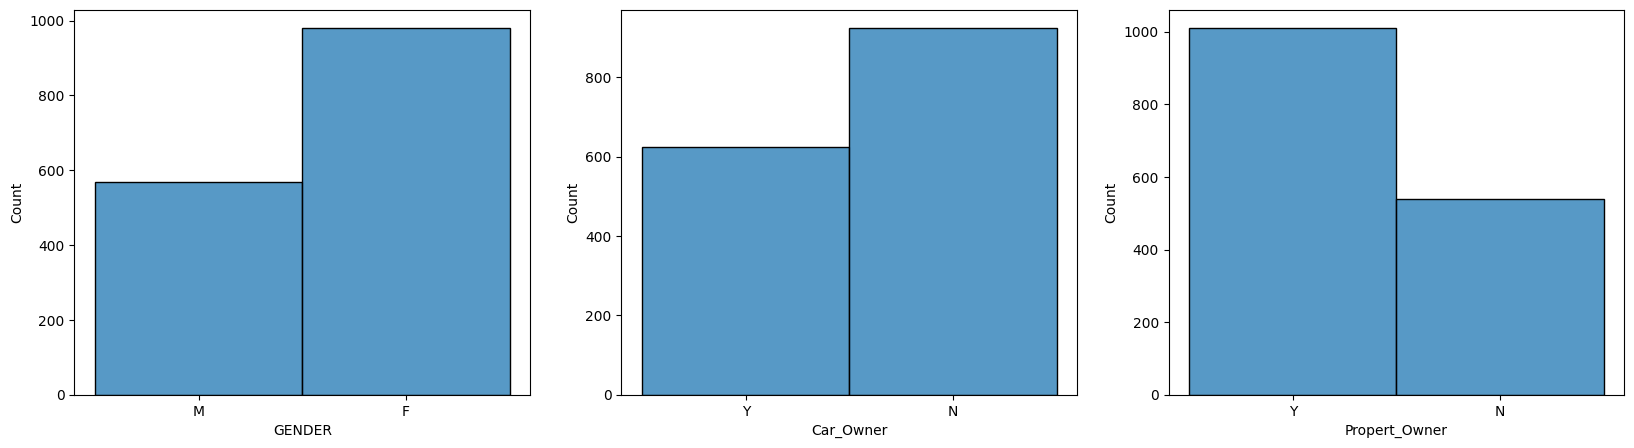

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(data['GENDER'], ax=axes[0])
sns.histplot(data['Car_Owner'], ax=axes[1])
sns.histplot(data['Propert_Owner'], ax=axes[2])
fig.show()

In [ ]:
data['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
data['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
data['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
data['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
data['Type_Occupation'].value_counts()

Laborers                 756
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

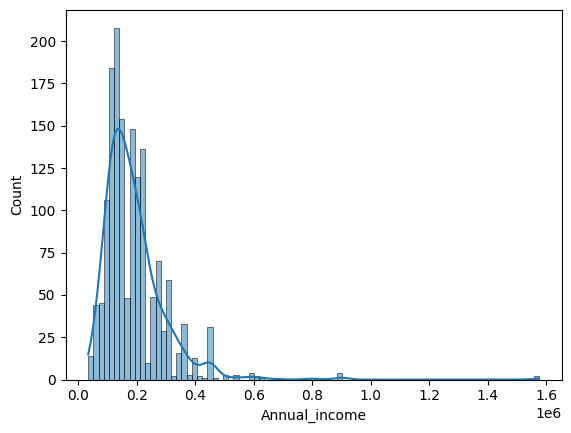

In [ ]:
sns.histplot(data['Annual_income'], kde=True)           #Annual_income column is right skewed
plt.show()

In [ ]:
data['Annual_income']=np.log(data.Annual_income)                         #Apply log to minimize the skewness

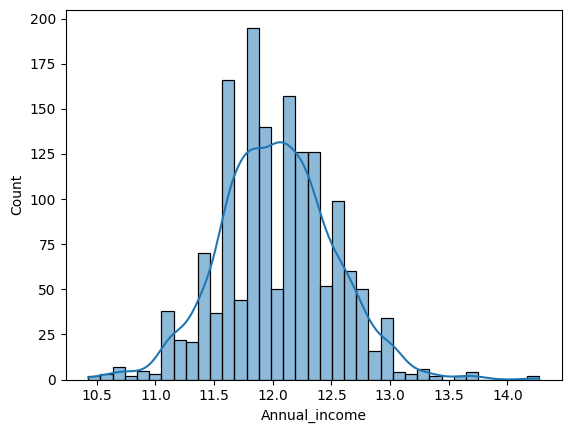

In [ ]:
sns.histplot(data['Annual_income'], kde=True)
plt.show()

In [ ]:
ohe = OneHotEncoder()
le = LabelEncoder()

In [ ]:
data = pd.get_dummies(data, columns=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

In [ ]:
data['GENDER'] = le.fit_transform(data['GENDER'])
data['Car_Owner'] = le.fit_transform(data['Car_Owner'])
data['Propert_Owner'] = le.fit_transform(data['Propert_Owner'])
data['label'] = le.fit_transform(data['label'])

In [ ]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,1,1,1,0,180000.0,51,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,5009744,0,1,0,0,315000.0,37,586,1,1,...,1,0,0,0,0,0,0,0,0,0
2,5009746,0,1,0,0,315000.0,42,586,1,1,...,1,0,0,0,0,0,0,0,0,0
3,5009749,0,1,0,0,166500.0,37,586,1,1,...,1,0,0,0,0,0,0,0,0,0
4,5009752,0,1,0,0,315000.0,37,586,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,166500.0,32,2182,1,0,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,0,0,0,225000.0,28,1209,1,0,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,1,1,1,2,180000.0,36,2477,1,0,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,1,1,0,0,270000.0,41,645,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Type_Occupation_Accountants',
       'Type_Occupation_Cleaning staff', 'Type_Occupation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ind_ID                                   1548 non-null   int64  
 1   GENDER                                   1548 non-null   int64  
 2   Car_Owner                                1548 non-null   int64  
 3   Propert_Owner                            1548 non-null   int64  
 4   CHILDREN                                 1548 non-null   int64  
 5   Annual_income                            1548 non-null   float64
 6   Birthday_count                           1548 non-null   int64  
 7   Employed_days                            1548 non-null   int64  
 8   Mobile_phone                             1548 non-null   int64  
 9   Work_Phone                               1548 non-null   int64  
 10  Phone                                    1548 no

#Section 4: Machine learning approach

1.What method will you use for machine learning based predictions for credit card approval?
 - Decision Tree
 - Random Forest
 - KNN Model
 - XGBoost

2. Please justify the most appropriate model.

  The most suitable model is XGBoost Classifier. It has the maximum accuracy among three ML models. It has maximum accuracy 90.32% and log loss is 3.48

3. Please perform necessary steps required to improve the accuracy of your model.
  - Decesion Tree Classifier I use criterion='entropy', max_depth=2 parameter
  - Random Forest Regressor I use max_depth=5, n_estimators=50, random_state=200 parameter
  - KNN I use metric='euclidean', weights='distance' parameter
  - XGBoost Regressor I use max_depth=50, n_estimators=60, random_state=1000 parameter


In [ ]:
x = data[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Type_Occupation_Accountants',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen staff']]
y = data[['label']]

1. Decision Tree model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [ ]:
tree_model = DecisionTreeClassifier(random_state=45)

In [ ]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=tree_model,param_grid=params,cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
GS.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=True)

In [ ]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 8}

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 20, min_samples_split = 8)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       min_samples_split=8)

In [ ]:
tree_y_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, tree_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,tree_y_pred))
print('Classification Report:\n', classification_report(y_test,tree_y_pred))

Accuracy: 87.74%
Confusion Matrix:
 [[  0  38]
 [  0 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.88      1.00      0.93       272

    accuracy                           0.88       310
   macro avg       0.44      0.50      0.47       310
weighted avg       0.77      0.88      0.82       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  4.41825428640791


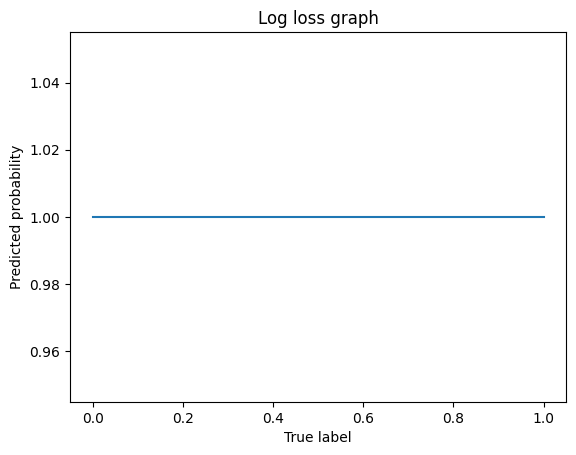

In [ ]:
log_loss_value = log_loss(y_test, tree_y_pred)
print('Log Loss: ', log_loss_value)

2. Random Forest model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [ ]:
rfc = RandomForestClassifier(random_state=200)

In [ ]:
param_grid = {
    'n_estimators': [1, 100],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
rfc1 = RandomForestClassifier(n_estimators= 100, max_depth= 8, criterion= 'gini', random_state = 200)
rfc1.fit(x_train,y_train)

<ipython-input-36-72fbeb7ee6ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, random_state=200)

In [ ]:
rfc_y_pred = rfc1.predict(x_test)
accuracy = accuracy_score(y_test, rfc_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,rfc_y_pred))
print('Classification Report:\n', classification_report(y_test,rfc_y_pred))

Accuracy: 87.74%
Confusion Matrix:
 [[  0  38]
 [  0 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.88      1.00      0.93       272

    accuracy                           0.88       310
   macro avg       0.44      0.50      0.47       310
weighted avg       0.77      0.88      0.82       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:  4.41825428640791


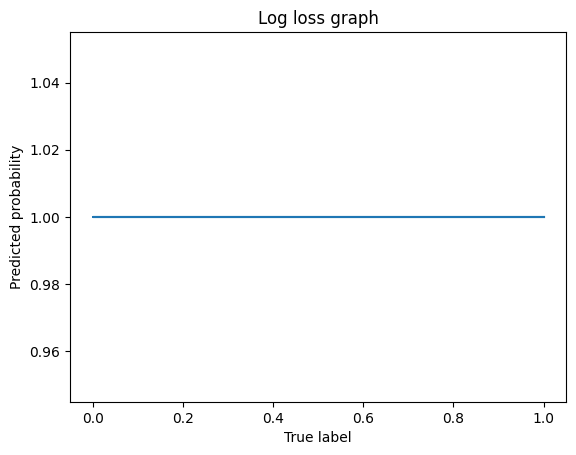

In [ ]:
log_loss_value = log_loss(y_test, rfc_y_pred)
print('Log Loss: ', log_loss_value)

3. KNN model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs_knn = GridSearchCV(estimator=knn_model, param_grid=grid_params, verbose = 1, cv=3, n_jobs = -1)
gs_knn.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
knn_model1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')
knn_model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')

In [ ]:
knn_y_pred = knn_model1.predict(x_test)
accuracy = accuracy_score(y_test, knn_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,knn_y_pred))
print('Classification Report:\n', classification_report(y_test,knn_y_pred))

Accuracy: 89.03%
Confusion Matrix:
 [[ 16  24]
 [ 10 260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.40      0.48        40
           1       0.92      0.96      0.94       270

    accuracy                           0.89       310
   macro avg       0.77      0.68      0.71       310
weighted avg       0.88      0.89      0.88       310



Log Loss:  3.9531748878386557


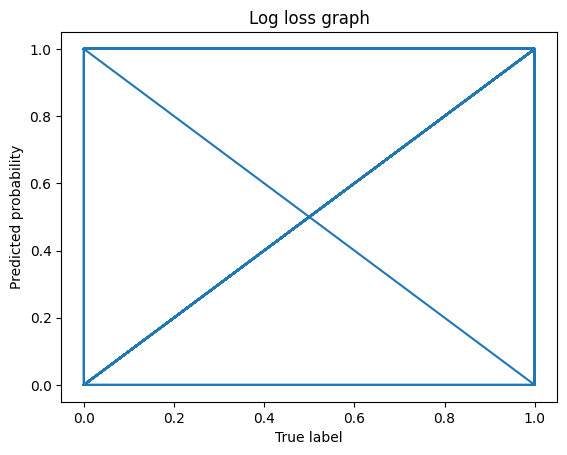

In [ ]:
log_loss_value = log_loss(y_test, knn_y_pred)
print('Log Loss: ', log_loss_value)

4. XGBoost model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [ ]:
grid = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3 )
grid.fit(x_train,y_train)

print('\n Best estimator:')
print(grid.best_estimator_)

print('\n Best parameters:')
print(grid.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits

 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

 Best parameters:
{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6}


In [ ]:
xgb_model1 = XGBClassifier(colsample_bytree = 1.0, gamma = 0.5, max_depth = 5, min_child_weight = 1, subsample = 0.6)
xgb_model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_pred = xgb_model1.predict(x_test)
accuracy = accuracy_score(y_test, xgb_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,xgb_y_pred))
print('Classification Report:\n', classification_report(y_test,xgb_y_pred))

Accuracy: 90.32%
Confusion Matrix:
 [[ 16  25]
 [  5 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.39      0.52        41
           1       0.91      0.98      0.95       269

    accuracy                           0.90       310
   macro avg       0.84      0.69      0.73       310
weighted avg       0.89      0.90      0.89       310



Log Loss:  3.488095489269402


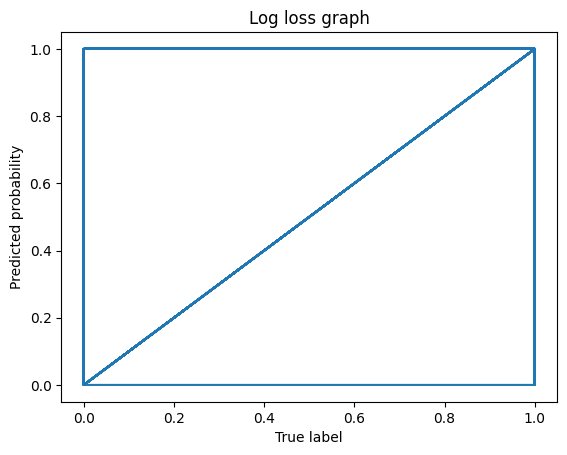

In [ ]:
log_loss_value = log_loss(y_test, xgb_y_pred)
print('Log Loss: ', log_loss_value)